# PSYC 193: Perception and Computation 
## Lab 1: Working with image data and analyzing typicality ratings

In this lab, we will be working with an image dataset used in a recent computer vision paper by [Sangkloy et al.](https://dl.acm.org/doi/abs/10.1145/2897824.2925954). 

**Learning objectives**
* Learn the basics of working with image data
* Analyze human typicality rating data 

**Submission instructions**
1. Please rename the notebook by replacing `YOURUSERNAME` in the filename with your actual UCSD AD username. 
2. Before submitting your assignment, sure that your notebook can run from "top to bottom," executing the code in every code cell without returning fatal errors. An easy way to verify this is to click "Kernel" above in the tool bar, and try selecting "Restart & Run All."
3. Once you have verified that your notebook can run "top to bottom" without issues, click "File" in the toolbar above, then "Download as," then "PDF via LaTeX" to download a PDF version of your notebook. 
4. Upload this PDF version of your notebook to Canvas before 5pm the next class period. 

#### Getting started with jupyter notebooks
If you are relatively new to writing Python code in jupyter notebooks, it's recommended that you check out the User Interface tour. Click Help in the toolbar. 

### setup

In [58]:
## load generally useful python modules
import os
import numpy as np
import pandas as pd
from PIL import Image
import requests
from io import BytesIO
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

### load in datasets

In [28]:
## import image metadata (from Sangkloy et al. (2016))
from photodraw32_metadata import metadata
M = pd.DataFrame(metadata)

In [29]:
## inspect what image metadata looks like using the pandas `head` function:
## see: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html
M.head()

### INSERT YOUR CODE HERE ####

,category,index,sketchy_preprocessing_mode,sketchy_filepath,sketchy_filename,photodraw32_filename,s3_filename,s3_url,batch_num
0,airplane,00,tx_000100000000,photodraw32_stims\airplane\n02691156_359.png,n02691156_359.png,airplane_00,n02691156_359_airplane_00.png,https://photodraw32.s3.amazonaws.com/n02691156...,5
1,airplane,01,tx_000100000000,photodraw32_stims\airplane\n02691156_507.png,n02691156_507.png,airplane_01,n02691156_507_airplane_01.png,https://photodraw32.s3.amazonaws.com/n02691156...,4
2,airplane,02,tx_000100000000,photodraw32_stims\airplane\n02691156_573.png,n02691156_573.png,airplane_02,n02691156_573_airplane_02.png,https://photodraw32.s3.amazonaws.com/n02691156...,0
3,airplane,03,tx_000100000000,photodraw32_stims\airplane\n02691156_987.png,n02691156_987.png,airplane_03,n02691156_987_airplane_03.png,https://photodraw32.s3.amazonaws.com/n02691156...,3
4,airplane,04,tx_000100000000,photodraw32_stims\airplane\n02691156_1692.png,n02691156_1692.png,airplane_04,n02691156_1692_airplane_04.png,https://photodraw32.s3.amazonaws.com/n02691156...,0


**What do you think each row of this dataframe represents?**

*INSERT YOUR OWN RESPONSE HERE*

### explore dataset

**How many different images are there in this dataframe?**

*INSERT YOUR OWN RESPONSE HERE*

hint: try using the `shape` function

In [39]:
### INSERT YOUR CODE HERE ####
M.shape

(1024, 9)

**How many different object categories are represented in the image dataset? (i.e., M dataframe)**

*INSERT YOUR OWN RESPONSE HERE*

hint: try using the `nunique` function

In [38]:
### INSERT YOUR CODE HERE ####
M.category.nunique()

32

**How many different images per category are in this dataset?**

*INSERT YOUR OWN RESPONSE HERE*

hint: try using `groupby` and `count` or `value_counts`

In [37]:
### INSERT YOUR CODE HERE ####
M['category'].value_counts()

raccoon           32
saw               32
jack-o-lantern    32
ray               32
hat               32
window            32
car_(sedan)       32
jellyfish         32
hotdog            32
snake             32
cup               32
piano             32
windmill          32
ape               32
fish              32
flower            32
motorcycle        32
butterfly         32
cat               32
bread             32
tree              32
lion              32
kangaroo          32
scorpion          32
skyscraper        32
mushroom          32
squirrel          32
castle            32
elephant          32
airplane          32
blimp             32
axe               32
Name: category, dtype: int64

### load and display a single image

**Here is sample code to display one of the "airplane" images in the dataset**

Example Image URL: https://photodraw32.s3.amazonaws.com/n02691156_359_airplane_00.png


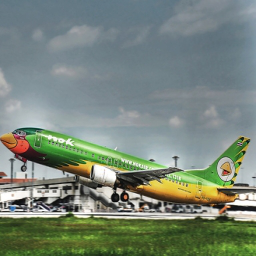

In [59]:
url = M['s3_url'].values[0] 
print('Example Image URL: {}'.format(url))
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

**Now display any one of the "lion" images in the dataset**

In [ ]:
## INSERT YOUR CODE HERE ##

### Practice with image processing

**What are the dimensions of the example airplane image from above (i.e., width x height x num_channels)?**

hint: Try looking up how to get sizes of images using the Python Imaging Library (PIL)

In [66]:
## INSERT YOUR CODE HERE ##

In [67]:
img.size

(256, 256)

**Convert image data to a NumPy array. What are its dimensions?**

*INSERT YOUR OWN RESPONSE HERE*

In [68]:
## INSERT YOUR CODE HERE ##

In [69]:
np.array(img).shape

(256, 256, 3)

**Inspect the values in the array. What do these values represent? What is the largest value, and what is the smallest value in the image array?**

Is the range of values what you expected? Check out [this page on 8-bit color graphics](https://en.wikipedia.org/wiki/8-bit_color) to learn more about this way of storing information about images. 

In [71]:
## INSERT YOUR CODE HERE ##

255
0


In [ ]:
array_img = np.array(img)
print(np.max(array_img))
print(np.min(array_img))

**Crop the middle 100x100 pixels from the image and display it.**

hint: Try using the `crop` function from PIL. Use the information you extracted earlier about the width and height of the image to determine where the middle 100x100 pixels are.

In [ ]:
## INSERT YOUR CODE HERE ##

In [73]:
left = 256/2 - 50
right = 256/2 + 50
top = 256/2 - 50
bottom = 256/2 + 50
img1 = img.crop((left, top, right, bottom)) 
img1

### analyze distribution of ratings 

In [56]:
## import image typicality ratings (from an unpublished dataset)
T = pd.read_csv('photodraw32_ratings.csv')

In [57]:
## inspect the dataframe
T.head()

,prolificID,img_id,category,trialNum,ratings,enumerated_ratings
0,5d87df4202971700016068c8,https://photodraw32.s3.amazonaws.com/n01447331...,fish,9,Very,1
1,5865dd647fbbcd00013973b8,https://photodraw32.s3.amazonaws.com/n01447331...,fish,53,Very,1
2,5e793ab51aff8103623757be,https://photodraw32.s3.amazonaws.com/n01447331...,fish,102,Very,1
3,5ec7bb4467b0da23311bd127,https://photodraw32.s3.amazonaws.com/n01447331...,fish,126,Moderately,0
4,5e8bce371e16e90ba6df085d,https://photodraw32.s3.amazonaws.com/n01447331...,fish,49,Very,1


#### Here is what the columns mean
* prolificID: anonymized participant identifier
* img_id: URL of image shown to participant
* category: category this image belongs to
* ratings: rating given by participants on 5-point scale from "Not typical at all" to "Extremely" typical
* enumerated_ratings: ratings converted to numeric scale ranging between -2 and +2

**How many ratings do we have per image?**

In [ ]:
## INSERT YOUR CODE HERE ##

**What does the distribution of ratings look like overall, across all images and categories?**

hint: for a basic histogram, try using matplotlib `plt.hist()`. For another option, try using plotting functions from [seaborn](https://seaborn.pydata.org/tutorial/distributions.html).

In [ ]:
## INSERT YOUR CODE HERE ##

**What does the distribution of average ratings look like for images within each category?**

hint: try using `FacetGrid` from [seaborn](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html).

In [ ]:
## INSERT YOUR CODE HERE ##

**How well do participants agree with one another on what rating to give to an image? Or, relatedly, how variable are the ratings given by different participants to the same image?**

hint: There isn't a single way to get at this question. Try to think about some metrics that might be useful, taking into account how often participants agree, and/or how large differences in ratings given between different participants are. 

**How much variation is there in typicality ratings between images within each category?**

hint: What are some metrics you know about to quantify variation?

**How much variation is there in typicality ratings between categories?**

**What are some examples of `lion` images that are rated as being highly typical? What about the least typical?** 

**Try to construct a 4 row x 8 column "image gallery" that displays all of the `lion` images from the most typical ones in top left to the least typical on the bottom right, where each image appears with the average rating it earned above it. Do the results make sense to you? Try to write your visualization code so that you can easily substitute a different category label other than `lion`.**